In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# ---------- cuts and crops
data_choice='Data1'
data_format=np.float64
average=True
results=np.load(data_choice+'.npz')
data_center=results['data_center']
data_edge=results['data_edge']
position_center=results['position_center']
position_edge=results['position_edge']

In [3]:
data_edge.shape

(28, 50000, 32, 64)

In [3]:
# ---------- cuts and crops
cut = 9 # not all positions are needed
position_edge = position_edge[cut:-cut]
data_edge = data_edge[cut:-cut, :]
data_center =  data_center[:,:,7:-7,20:-20]
data_edge = data_edge[:,:,7:-7,20:-20]
data_center=data_center.astype(data_format)
data_edge=data_edge.astype(data_format)
delta = position_center[2]-position_center[0] # the step size

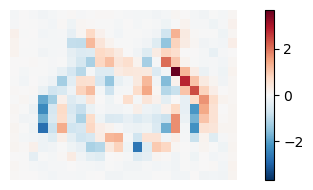

In [4]:
# ---------- visualize the data
diff_image=np.mean(data_center[-1,:,:],axis=0)-np.mean(data_center[0,:,:],axis=0)
diff_image=np.mean(data_center[-1,:,:],axis=0)-np.mean(data_center[0,:,:],axis=0)
plt.figure(figsize=(6,2))
plt.imshow(diff_image,cmap='RdBu_r')
plt.clim(-np.max(np.abs(diff_image)),np.max(np.abs(diff_image)))
plt.axis('off')
plt.colorbar()
plt.tight_layout()

In [5]:
# ---------- combine measurements in the center and at the edges to get a complete data set
N = data_edge.shape[1] # samples per position in the training dataset
Npositions = position_edge.shape[0] + position_center.shape[0]
# join data_edge with a randomly selected fraction of data_center
idx = np.arange(data_center.shape[1])
# torch.manual_seed(2)
np.random.shuffle(idx) # random shuffle to make up for drifts of the setup
data_center = data_center[:,idx,:,:]
position_training = np.insert(position_edge, int(position_edge.shape[0]/2), position_center)
speckles = np.insert(data_edge, int(position_edge.shape[0]/2), data_center[:,:data_edge.shape[1],:,:], axis=0)
speckles_testing = data_center[:,data_edge.shape[1]:,:,:]
position_testing = position_center
speckles_testing = speckles_testing[:,:150000, :,:] # reduce the data set because not all of it is needed

In [6]:
# ---------- save training and testing data
x_tr = speckles.reshape(speckles.shape[0]*speckles.shape[1], 1, speckles.shape[2],speckles.shape[3])
print("x_tr shape: ",x_tr.shape)
# out
y_tr = np.zeros(shape=(Npositions*N))
for p in range(Npositions):
    y_tr[p*N:(p+1)*N] = position_training[p]
    x_tst = speckles_testing.reshape(speckles_testing.shape[0]*speckles_testing.shape[1], speckles_testing.shape[2],speckles_testing.shape[3])
print("x_tst shape: ",x_tst.shape)
#export
np.save("x_tr.npy", x_tr)
np.save("y_tr.npy", y_tr)
np.save("x_tst.npy", x_tst)

x_tr shape:  (650000, 1, 18, 24)
x_tst shape:  (450000, 18, 24)
